p-value <= 0.05  귀무가설 기각
p-value > 0.05 귀무가설 채택

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import rc
import seaborn as sns

%matplotlib inline

In [5]:
# 한글 폰트 깨지지 않게 하기
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

    - 정규 분포 확률 : 샘플 수, 정규성 검사(정규분포 하는지 안하는지 확인), 평균과 표준편차가 있는지...
    - 이항 분포 확률 구하기
    - 카이제곱검정 등 검정문제 (근데 과정이 있어야해)
    - 평균 검정(2sample, paired t sample) 
        * 투샘플은 다른 집단에서 두개
        * 페어드는 같은 집단에서 두개(학원 다닌 후 바뀐 어쩌구, 같은 자동차에 윤활유만 바꿧을때 이런)
    - 상관분석 (가설검정, 추론통계)

### 정규분포 확률

In [12]:
# 정규 분포 확률
# 평균과 표준편차가 주어졌을 때

# 누적확률 값 계산
x = 15 # 구하고 싶은 값
mu = 12 # 평균
sigma = 3 # 표준편차

# prob1: x 이하인 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma) 
print("{0} km ~ {1} km 달릴 확률 {2:.1f}%에 해당".format(mu, x, (prob-0.5)*100))

12 km ~ 15 km 달릴 확률 34.1%에 해당


Shapiro-Wilk Test p-value: 0.5253924062862338


<Axes: ylabel='Count'>

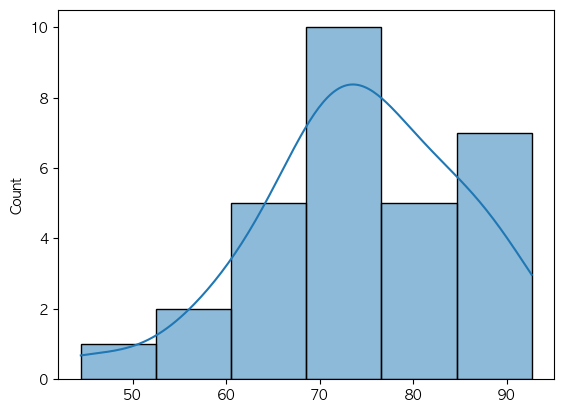

In [11]:
# 만약 평균과 표준편차가 주어지지않고 판단해야한다면?
# 샘플 수 확인 (30개 이상), shapiro 검정 -> 평균과 표준편차 구하고, 확률 구하기

# 샘플 데이터 생성 (예시: 시험 점수)
np.random.seed(0)
sample_data = np.random.normal(loc=70, scale=10, size=30)

# 정규성 검정 (Shapiro-Wilk Test)
stat, p_value = stats.shapiro(sample_data) 
print(f"Shapiro-Wilk Test p-value: {p_value}")
# p-value > 0.05 여야 정규분포를 따른다. 귀무가설 채택

# 히스토그램 그리기
sns.histplot(sample_data, kde = True)

In [ ]:
# 정규분포 신뢰구간 추정
# 모 표준편차를 알 때 

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40)) # 신뢰구간, 모평균, scale = 모표준편차/표본갯수)
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

In [ ]:
# 정규분포 신뢰구간 추정
# 모 표준편차를 모를 때 
# t 분포 구간추정 함수 실행 : (loc: 평균의 값, scale: 변동 정도)  

lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df)) # 신뢰구간, 자유도, 평균, 표본표준오차
lower.round(2), upper.round(2)

In [ ]:
# t 분포 확률 계산하기
# 표본의 수가 30개 이하거나, 모집단의 std를 모를 때 사용

t = 1.53
df = 5 # 자유도

# 누적확률 값 계산
prob = stats.t.cdf(t, df)
print(" P(T<=t)= {:.1f}%".format(prob*100))

### 이항분포 확률

In [13]:
# 이항분포에서 확률 계산하기 : pmf(k,n,p) 
n = 3      # n : 3대의 차량 수
p = 0.4    # 공정 불량

for i in range(n+1) :
   # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=p)  
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### 카이제곱 등 검정 문제
 - t-test : 평균의 차이에 대한 검정
 - 1-sample t test : 단일 집단의 모평균 검정 (고객만족도와 요인)
 - 2-sample t test : 두개의 집단에 평균차이 검정 (서로 다른 두 집단 - 독립적이어야 함)
 - paired t test :  하나의 단위를 두고 전후 차이 검정 (같은 집단의 전후, 앞뒤 차이)
 - 1 proportion : 한 집단의 비율이 특정 비율과 같은지 비교
 - 2 proportions : 두 집단의 비율이 같은지 비교
 - 카이제곱: 관찰값과 기대값의 비교
 - ANOVA : 세(두)개 이상의 집단에 대한 평균 분석 비교
 - 상관분석 : 두 연속형 집단의 선형관계 분석

In [14]:
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

카이제곱 검정 유형	                      귀무가설 (H₀)	       대립가설 (H₁)
적합성 검정 (Goodness of Fit Test)	"관찰값과 기대값이 동일하다."	"관찰값과 기대값이 다르다."
독립성 검정 (Test for Independence)	"두 변수는 서로 독립이다."	"두 변수는 서로 상관관계가 있다."
동질성 검정 (Test for Homogeneity)	"두 모집단의 분포는 동일하다."	"두 모집단의 분포는 다르다."

In [15]:
# df 생성  
df = pd.DataFrame({'Work_1': [270, 228, 277], 
                   'Work_2': [260, 285, 284], 
                   'Work_3': [236, 225, 231],
                   'Work_4':[234, 262, 208]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 13.366
 p: 0.038
 degree pf freedom: 6
 expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


In [ ]:
# 'A‘. ’B’, ’C’ 정규성 검정: Shapiro-Wilk Test
f, p = stats.shapiro(df['A']) # 각각마다 다 해줘야함
print("statistic={}, p-value={}".format(f,p))

In [ ]:
# 'A‘. ’B’, ’C’ 등분산성 검정: bartlett Test
stats.bartlett(df['A'], df['B'], df['C'])

In [18]:
# 1 proportion

# 변수 선언 
count = 15
n_obs = 100
value = 0.1

# Proportion test 실행
z, p = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print( "1 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

1 Proportion test 
 z: 1.400
 p: 0.161


In [ ]:
# 2 proportion
# 변수 선언 
count = np.array([4, 1])
nobs = np.array([1000, 1200])

# Proportion test 실행
z, p = proportions_ztest(count, nobs)

# Proportion test 결과 출력
print( "2 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

### 평균검정

In [20]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), \
       t_result.pvalue.round(3)

# 1-Sample t-test의 t값  p값 출력
print( "1-Sample t-test ")
print( " t 통계량 : {} " .format(t))
print( " p-value : {} " .format(p))

1-Sample t-test 
 t 통계량 : [11.871 24.43  48.42  10.131] 
 p-value : [0.007 0.002 0.    0.01 ] 


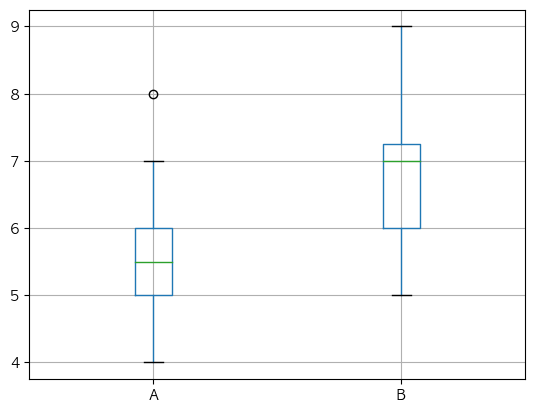

statistic=0.9094843757142952, p-value=0.06231014582345957
statistic=0.9142492813717525, p-value=0.07683589072502073
2-Sample t-test 
 t: -3.335 
 p: 0.002 


In [22]:
# 2 sample t test
# boxplot, 정규성 검정, 등분산성, 검정

# Data직접 입력 
df = pd.DataFrame({'A': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7], 
                   'B': [7, 6, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})
df.head()

# Group별 boxplot
df.boxplot(['A','B'])
plt.show()

# ‘A‘, ‘B’ 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

# 등분산성 검정
stats.bartlett(df['A'], df['B'])

# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print( "2-Sample t-test ")
print( " t: {} " .format(t)) # 두 그룹의 평균 차이가 표준오차에 비해 얼마나 큰지
print( " p: {} " .format(p))

In [23]:
# paired t test

# df1, df2를 직접 입력 
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test의 t값 p값 출력
print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: [-5.324] 
 p: [0.] 


### 상관분석
1️⃣ 가설 설정
2️⃣ 정규성 검사
3️⃣ 상관계수 선택
4️⃣ 유의성 검정 (p-value)
5️⃣ 결론 도출

In [16]:
# 상관계수가 높고 피밸류가 낮다면, 귀무가설이 기각되며 상관관계는 강하지만 통계적으로 유의미하지 않다는 것을 의미함
# 상관계수가 낮고 피밸류가 높으면, 선형관계가 아닐 수 있거나 이상치가 많은것임

In [17]:
# df 생성  
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력 
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: 0.989
 p-value : 0.000
